In [6]:
import pandas as pd

data ="./data/synthetic_crop_dataset_india.csv"

df = pd.read_csv(data)

In [7]:
df.head(5)

,Temperature,Humidity,Moisture,Soil Type,Nitrogen,Potassium,Phosphorous,Season,Region,Crop Type
0,22.0,58.6,46.5,Loamy,48,27,23,Rabi,South,Wheat
1,38.0,62.6,47.7,Red,31,28,6,Zaid,North,Tobacco
2,18.1,65.4,35.4,Alluvial,21,48,26,Rabi,East,Sugarcane
3,18.1,60.2,35.7,Black,51,20,32,Rabi,Central,Millets
4,34.5,48.7,25.2,Red,12,55,41,Zaid,Central,Ground Nuts


In [8]:
df.isnull().sum()

Temperature    0
Humidity       0
Moisture       0
Soil Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Season         0
Region         0
Crop Type      0
dtype: int64

Text(0, 0.5, '')

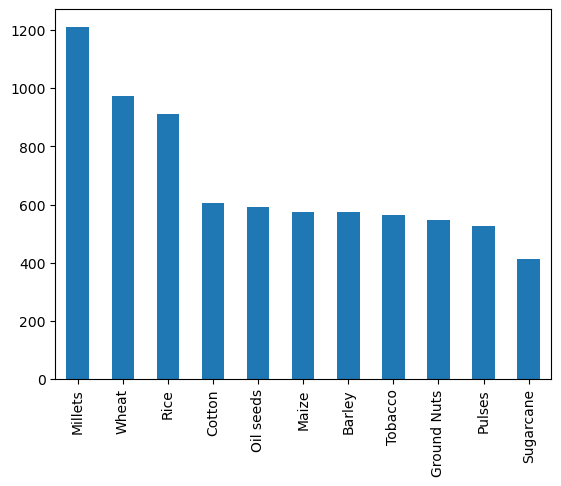

In [9]:
import matplotlib.pyplot as plt

df['Crop Type'].value_counts().plot(kind='bar')
plt.title("")
plt.xlabel("")
plt.ylabel("")

In [10]:
cols = ["Temperature","Humidity","Moisture","Soil Type","Nitrogen","Potassium","Phosphorous","Season","Region"]

In [11]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


process = ColumnTransformer(
    transformers = [
        ("number_col",'passthrough',[feature for feature in cols if df[feature].dtype in ['int64', 'float64']]),
        ("string_col",OneHotEncoder(),[feature for feature in cols if df[feature].dtype == 'object'])    
    ]
)

model = Pipeline(
    steps = [
        ('processor',process),
       #('classfier', KNeighborsClassifier(n_neighbors=3))
        ('classfier',RandomForestClassifier())
    ]
)

y = df["Crop Type"]
X = df[cols]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

model.fit(X_train,y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('number_col', 'passthrough',
                                                  ['Temperature', 'Humidity',
                                                   'Moisture', 'Nitrogen',
                                                   'Potassium',
                                                   'Phosphorous']),
                                                 ('string_col', OneHotEncoder(),
                                                  ['Soil Type', 'Season',
                                                   'Region'])])),
                ('classfier', RandomForestClassifier())])

In [12]:
from sklearn.metrics import classification_report,accuracy_score 

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

      Barley       0.43      0.43      0.43       134
      Cotton       0.46      0.42      0.44       126
 Ground Nuts       0.35      0.32      0.33       110
       Maize       0.36      0.34      0.35       115
     Millets       0.41      0.40      0.40       229
   Oil seeds       0.30      0.35      0.32       111
      Pulses       0.27      0.20      0.23       111
        Rice       0.32      0.30      0.31       183
   Sugarcane       0.28      0.28      0.28        82
     Tobacco       0.35      0.45      0.39       101
       Wheat       0.35      0.40      0.38       198

    accuracy                           0.36      1500
   macro avg       0.35      0.35      0.35      1500
weighted avg       0.36      0.36      0.36      1500

Accuracy: 0.35933333333333334


In [17]:
user_input = {}
for feature in cols:
    user_input[feature] = input(f"{feature} : ").strip()

user_df = pd.DataFrame([user_input])
y_pred = model.predict(user_df)

print(f"\n\n Predicted Crop : {y_pred[0]}")

Temperature : 15
Humidity : 45
Moisture : 40
Soil Type : Sandy
Nitrogen : 25
Potassium : 20
Phosphorous : 21
Season : Rabi
Region : North


 Predicted Crop : Wheat


In [14]:
import joblib

joblib.dump(model, "Classifier.pkl")
print("Saved with updated One")

Saved with updated One
